In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

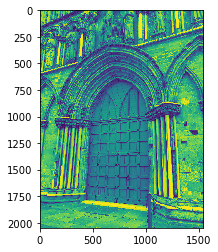

In [2]:
img_ = cv2.imread('1.JPEG')
img_ = cv2.resize(img_, (0,0), fx=1, fy=1)
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)

img = cv2.imread('2.JPEG')
img = cv2.resize(img, (0,0), fx=1, fy=1)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img2)

In [3]:
#FEATURE DETECTION AND DESCRIPTION EXRACTION OF IMAGE 1 AND 2
sift = cv2.SIFT_create()
# find the key points and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


(4995, 128)

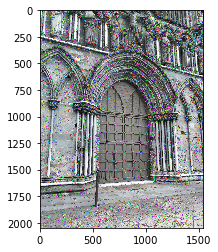

In [14]:
plt.imshow(cv2.drawKeypoints(img_,kp1,None))
ss1 = des1[5:5000,:]
ss1.shape

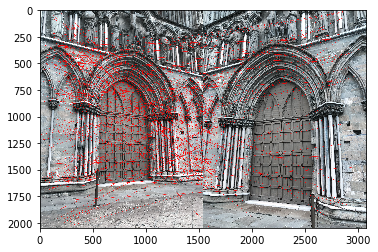

In [15]:
#FEATURE MATCHING
match = cv2.BFMatcher()
matches = match.knnMatch(ss1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append(m)
        
        
draw_params = dict(matchColor = (255,0,0), # draw matches in green color
                   singlePointColor = None,
                   flags = 2)

img3 = cv2.drawMatches(img_,kp1,img,kp2,good,None,**draw_params)
plt.imshow(img3)

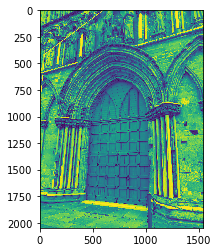

In [19]:
 #Estimate Homography and stitch image
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    plt.imshow(img2)
else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))

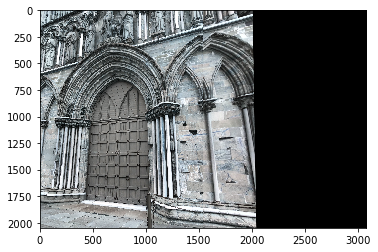

In [22]:
#Decomposing H and extracting the different transformations to stitch image 2 onto image 1
dst = cv2.warpPerspective(img_,M,(img.shape[1] + img_.shape[1], img.shape[0]))
dst[0:img.shape[0], 0:img.shape[1]] = img
plt.imshow(dst)